In [23]:
import pandas as pd
import re
from nltk import word_tokenize
import nltk
import numpy as np
from sklearn.metrics import classification_report, plot_confusion_matrix
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk import FreqDist
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shawn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Shawn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
data = pd.read_csv('judge_1377884607_tweet_product_company.csv')

In [3]:
data.head(10)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
6,NaN,NaN,No emotion toward brand or product
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8721 entries, 0 to 8720
Data columns (total 3 columns):
tweet_text                                            8720 non-null object
emotion_in_tweet_is_directed_at                       3169 non-null object
is_there_an_emotion_directed_at_a_brand_or_product    8721 non-null object
dtypes: object(3)
memory usage: 204.5+ KB


In [5]:
data[data['tweet_text'].isna()]

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
6,NaN,NaN,No emotion toward brand or product


In [6]:
data.drop(inplace= True, index=6)

In [7]:
data.head(10)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion
10,Excited to meet the @samsungmobileus at #sxsw ...,Android,Positive emotion


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8720 entries, 0 to 8720
Data columns (total 3 columns):
tweet_text                                            8720 non-null object
emotion_in_tweet_is_directed_at                       3169 non-null object
is_there_an_emotion_directed_at_a_brand_or_product    8720 non-null object
dtypes: object(3)
memory usage: 272.5+ KB


In [11]:
%run -i "clean_lemmatize_token.py"

In [12]:
tokens = []
for tweet in data['tweet_text']:
    tokens.append(clean_lemmatize_token(tweet))

In [13]:
len(tokens)

8720

In [14]:
tokens = pd.Series(tokens)

In [15]:
corpus = []
for token in tokens:
    corpus += token

In [16]:
freq = FreqDist(corpus)

In [17]:
freq.most_common(25)

[('sxsw', 9140),
 ('mention', 6951),
 ('the', 4294),
 ('link', 4131),
 ('}', 4109),
 ('{', 4107),
 ('to', 3480),
 ('at', 3009),
 ('rt', 2952),
 ('google', 2534),
 ('a', 2450),
 ('for', 2450),
 ('ipad', 2421),
 ('apple', 2204),
 (':', 1969),
 ('in', 1859),
 ('is', 1645),
 ('of', 1641),
 ('quot', 1621),
 ('and', 1573),
 ('i', 1523),
 ('iphone', 1513),
 ('store', 1451),
 ('on', 1289),
 ('s', 1241)]

In [18]:
data.insert(2, 'tokens', tokens, True)

In [19]:
data.head()

,tweet_text,emotion_in_tweet_is_directed_at,tokens,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,"[wesley83, i, have, a, 3g, iphone, after, 3, h...",Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,"[jessedee, know, about, fludapp, awesome, ipad...",Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,"[swonderlin, can, not, wait, for, ipad, 2, als...",Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,"[sxsw, i, hope, this, year, s, festival, isn, ...",Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,"[sxtxstate, great, stuff, on, fri, sxsw, :, ma...",Positive emotion


In [28]:
binary = data[(data['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Negative emotion')|
              (data['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Positive emotion')]

In [30]:
logreg = LogisticRegression(solver= 'lbfgs', multi_class = 'auto', 
                            max_iter = 400, class_weight = 'balanced')
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(binary['tweet_text'])
Y = binary['is_there_an_emotion_directed_at_a_brand_or_product']
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2)
logreg.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=400)

In [31]:
y_pred = logreg.predict(X_test)
report = classification_report(y_test, y_pred)

                  precision    recall  f1-score   support

Negative emotion       0.62      0.68      0.65       111
Positive emotion       0.94      0.92      0.93       572

        accuracy                           0.88       683
       macro avg       0.78      0.80      0.79       683
    weighted avg       0.89      0.88      0.88       683



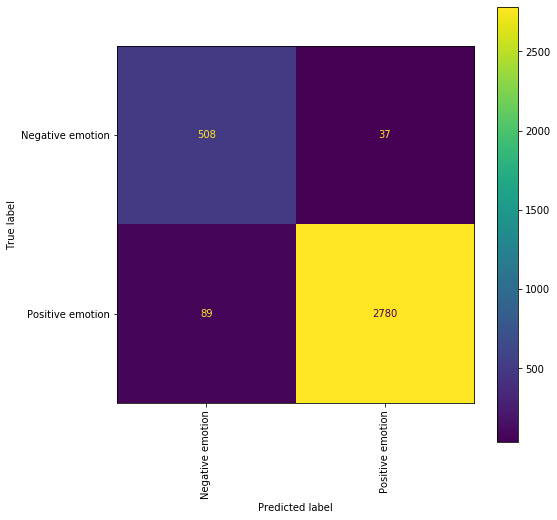

In [32]:
fig, ax = plt.subplots(figsize= (8,8))
plot_confusion_matrix(logreg, X, Y, 
                      ax=ax, xticks_rotation = 'vertical')
print(report)